# Student Alcohol Consumption
### Social, gender and study data from secondary school students in two portugese schools

There is a lot you can do before you build a machine learning algorithm and not all data science problems require a fancy algorithmic solution. Using your data wisely to tell a story and find useful relationships is a very important part of the process, sometimes even more so than a fancy model.


In the following dataset we will do a few tasks: <br>
1. State the __goal__ you aim to achieve, i.e. the main relationship you plan to investigate and why you think it is interesting/important to investigate it.
2. Import, if appropriate for the use case you chose __merge__, and clean the data.
3. Build different types of __visualizations__ that you view appropriate (scatter, line plots, box plots etc). What conclusions do you draw from them? Use the visualizations wisely, they should enhance the story, not overload the reader/the person to whom you will present your results.
4. Find __linear relationships__ in the data by using correlation plots. What story does the correlation plot tell you? What does it not?
5. Investigate __distributions__ of features (you may want to start from the target).
6. Use __hypothesis tests__ wisely to see if different groups in the data behave differently (you don’t need to test this for all features, only for a few which make sense to you).

Upload your Jupyter notebook with code, extensive comments and markdown sections. Imagine you are writing this for a business audience with little technical background. Even if they are not able to follow your code, your reasoning and conclusions should be clear and understandable. Always err on the side of providing more text and explanations rather than too little.

In [242]:
# Import of necessary packages
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import datetime as dt
from IPython.display import Image, display, clear_output

__________
### Step 1 - The Goal: Find factors of study-success or failure of pupils form the two schools

__Purpose:__
With this analysis we want to have a closer look into the dataset and find factors of success and failure.<br>
The dataset is based on a detailed survey filled by the pupils of two portugese schools in two different courses (Portguese and Mathematics). Especially the relation between certain factors and the success or failure (school grades) of pupils shall be investigated. We will probalby not be able to distinguish always between cause and effect, but we will see correlations.

__Column explication:__
Before we do so, let's check the different columns and their meanings.<br>
school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)<br>
sex - student's sex (binary: 'F' - female or 'M' - male)<br>
age - student's age (numeric: from 15 to 22)<br>
address - student's home address type (binary: 'U' - urban or 'R' - rural)<br>
famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)<br>
Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)<br>
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)<br>
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)<br>
Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')<br>
guardian - student's guardian (nominal: 'mother', 'father' or 'other')<br>
traveltime - home to school travel time (numeric: 1 - 1 hour)<br>
studytime - weekly study time (numeric: 1 - 10 hours)<br>
failures - number of past class failures (numeric: n if 1<=n<3, else 4)<br>
schoolsup - extra educational support (binary: yes or no)<br>
famsup - family educational support (binary: yes or no)<br>
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)<br>
activities - extra-curricular activities (binary: yes or no)<br>
nursery - attended nursery school (binary: yes or no)<br>
higher - wants to take higher education (binary: yes or no)<br>
internet - Internet access at home (binary: yes or no)<br>
romantic - with a romantic relationship (binary: yes or no)<br>
famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)<br>
freetime - free time after school (numeric: from 1 - very low to 5 - very high)<br>
goout - going out with friends (numeric: from 1 - very low to 5 - very high)<br>
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
health - current health status (numeric: from 1 - very bad to 5 - very good)<br>
absences - number of school absences (numeric: from 0 to 93)<br>


These grades are related with the course subject, Math or Portuguese:<br>
G1 - first period grade (numeric: from 0 to 20)<br>
G2 - second period grade (numeric: from 0 to 20)<br>
G3 - final grade (numeric: from 0 to 20, output target)<br>

__________
### Step 2 - Import: Let's import, join and (if necessary) clean the data

In [2]:
# Let's import the two survey inputs:
df_mat = pd.read_csv("student-mat.csv")
df_por = pd.read_csv("student-por.csv")

In [3]:
# let's have first looks into the two datasets:
df_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
# let's have first looks into the two datasets:
df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


The question on how to combine these two sets looks easier than thought in the beginning:<br>
We have two sets with students in two classes, but only some of them visited both classes. Hence we have to decide how to reduce the simple joint of both.

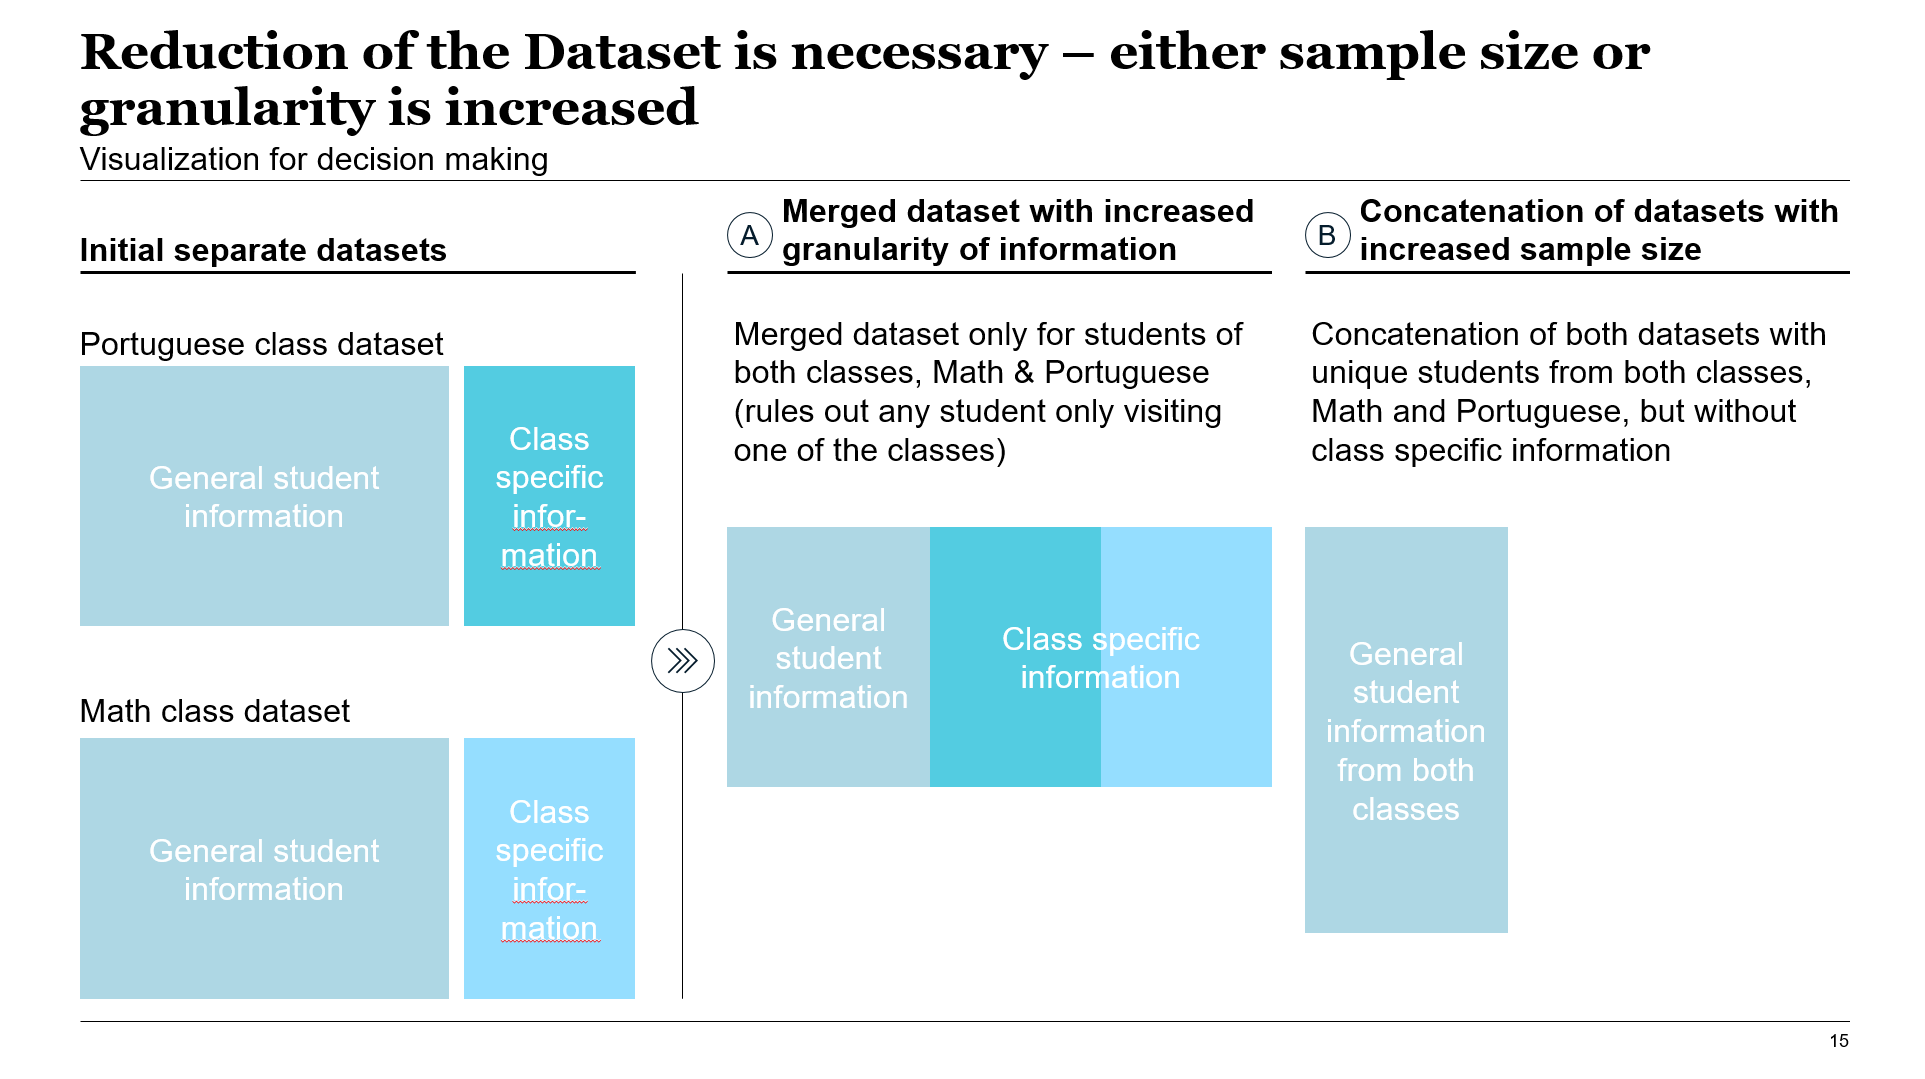

In [5]:
Image("Dataset_reduction.png")

Looking back at our initial goal (finding correlating factors to success and failure of students) only the class specific information (which contain grades) can tell us.<br>
Therefor we will go with __solution (A)__ and only look at students who visited both classes.

It will allow for more data on their grades (not just 3 but 6 datapoints) but will reduce the sample down to 100 students (you will see in the next steps).
The alternative of only taking one of the datasets is dissmissed, simply because we would neglect a lot of valuable information and would have a "drifted" sample (e.g. students that are below average in math but way above average in portuguese would lead to wrong conclusions). Also, as mentioned above, we focuse on grades, hence this information outweights the benefit of information about additional students.  

In [6]:
# Before we start merging, we need to sort the data columns to general and specific ones
# Hence we shift columns 'Paid' & "failure" before the Grade-Columns
first_secondary_information_column = df_por.pop('paid')
second_secondary_information_column = df_por.pop('failures')

  
# insert columns using insert(position,column_name,first_column) function
df_por.insert(28, 'paid', first_secondary_information_column)
df_por.insert(28, 'failures', second_secondary_information_column)

# Let's do the same for the math-dataset
first_secondary_information_column = df_mat.pop('paid')
second_secondary_information_column = df_mat.pop('failures')
df_mat.insert(28, 'paid', first_secondary_information_column)
df_mat.insert(28, 'failures', second_secondary_information_column)
df_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,failures,paid,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,0,no,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,0,no,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,3,yes,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,0,yes,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,0,yes,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,4,4,5,4,11,2,yes,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,3,0,no,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,3,3,3,no,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,1,3,4,5,0,0,no,11,12,10


In [7]:
# lets rename them:
df_por.rename(columns={"failures":"failures_por", "paid":"paid_por", "G1":"G1_por", "G2":"G2_por" , "G3":"G3_por"}, inplace=True)
df_mat.rename(columns={"failures":"failures_mat", "paid":"paid_mat", "G1":"G1_mat", "G2":"G2_mat" , "G3":"G3_mat"}, inplace=True)

In [8]:
# Let's prepare the new dataset and final dataset df_combined
df_combined = pd.DataFrame(df_por.columns).transpose()
df_combined.columns = df_combined.iloc[0]
df_combined = df_combined.drop(0)
df_combined["failures_mat"],df_combined["paid_mat"],df_combined["G1_mat"],df_combined["G2_mat"],df_combined["G3_mat"] = 0,0,0,0,0
df_combined

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,failures_por,paid_por,G1_por,G2_por,G3_por,failures_mat,paid_mat,G1_mat,G2_mat,G3_mat


In [9]:
# For every row in df_por and all their column-entries (excluded the last 4) check if there is a row in df_mat wich matches all column-entries.
# If that is the case add the last four entries of df_mat to df_por as new columns


# In this case, the iteration with iterows is okay, since the dataframes are rather small, otherwise the processing time is not acceptable
n = 1
# We loop through every row in the first dataframe and compare it to every row in the second dataframe
for index, por_row in df_por.iterrows():
    por_row = por_row
    for index2, mat_row in df_mat.iterrows():
        mat_row = mat_row
        # If we find matching rows (for the general student information) we add this instance to the new dataframe and append the class-specific information from both dataframes separately
        if ((por_row.iloc[:28] == mat_row.iloc[:28]).all() == True):
            clear_output(wait=True)
            df_combined = df_combined.append(por_row.append(mat_row.iloc[28:]), ignore_index = True)
            # Build-In progress update
            print("Progress:",n,"%")
            n += 1
        else:
            pass
print("DataFrame preparation finished.")
df_combined

# PS: I am very happy if you can show me how to do such an operation for two larger dataframes. I stumble upon this task frequently and have not yet found the best way. HELP appreciated!!!

Progress: 100 %
DataFrame preparation finished.


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,failures_por,paid_por,G1_por,G2_por,G3_por,failures_mat,paid_mat,G1_mat,G2_mat,G3_mat
0,GP,M,16,U,LE3,T,2,2,other,other,...,0,no,13,12,13,0,no,12,12,11
1,GP,M,15,U,LE3,A,3,2,services,other,...,0,no,15,16,17,0,yes,16,18,19
2,GP,M,15,U,GT3,T,3,4,other,other,...,0,no,12,12,13,0,yes,14,15,15
3,GP,M,15,U,GT3,A,2,2,other,other,...,0,no,14,14,15,0,no,14,16,16
4,GP,M,15,U,GT3,T,4,3,teacher,other,...,0,no,12,13,14,0,no,13,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,MS,M,18,R,LE3,T,1,2,at_home,services,...,0,no,9,10,10,0,yes,14,12,12
96,MS,F,17,U,GT3,T,2,2,other,at_home,...,0,no,10,11,12,0,no,13,11,11
97,MS,F,18,R,LE3,T,4,4,other,other,...,0,no,15,17,17,0,no,19,18,19
98,MS,M,18,U,GT3,T,4,4,teacher,teacher,...,0,no,17,18,19,0,yes,15,14,14


In [172]:
# Now that we have exactly what we aimed for (as described above (A)), we can quickly check for missing values to finish cleaning
print("There are",df_combined.isna().sum().sum(),"NaN-values in the dataset.")

There are 0 NaN-values in the dataset.


In [11]:
# Outliers and other plausability checks follow in the next step (but not that relevant in this dataset since most of the columns have binary dataand no numericals)
# For later steps, we create a combined grade column and combined alcohol consumption column
df_combined["G_sum"] = df_combined["G1_por"] + df_combined["G2_por"] + df_combined["G3_por"] + df_combined["G1_mat"] + df_combined["G2_mat"] + df_combined["G3_mat"]  
df_combined["Alc_sum"] = df_combined["Walc"] + df_combined["Dalc"]

_________
### Step 3 - Visualizations: Build different visualizations that you view appropriate and benefit your storyline

Before we can start looking into the different factors that might lead (or better "are related", we talked about cause and effect) to success or failure,we have to get a propper understanding of the data:

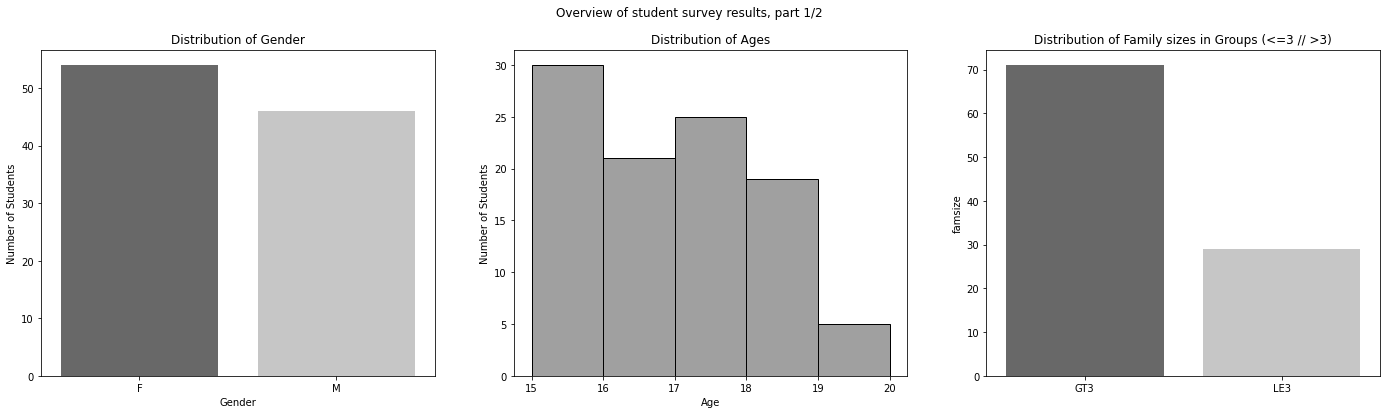

In [269]:
# Before we can start looking into the different factors that might lead (or better "are related", we talked about cause and effect) to success or failure,
# we have to get a propper understanding of the data

# Let's get an overview:
fig, axes = plt.subplots(1, 3, figsize=(24,6))
fig.suptitle('Overview of student survey results, part 1/2')

# Plot 1: Sex distribution
plt.subplot(1,3,1).set_title('Distribution of Gender')
sns.barplot(x=df_combined["sex"].value_counts().index, y=df_combined["sex"].value_counts(), palette="Greys_r")
plt.ylabel('Number of Students')
plt.xlabel('Gender')

# Plot 2: Age distribution
plt.subplot(1,3,2).set_title('Distribution of Ages')
sns.histplot(data=df_combined, x="age", bins = 6, binwidth= 1, color="grey")
plt.ylabel('Number of Students')
plt.xlabel('Age')

# Plot 3: Family size distribution
#plt.subplot(1,3,3)
sns.barplot(ax=axes[2], x=df_combined["famsize"].value_counts().index, y=df_combined["famsize"].value_counts(), palette="Greys_r").set_title('Distribution of Family sizes in Groups (<=3 // >3)')
plt.show()

From this initial scan we can see that:
1. There are slightly more women in the sample
2. Students ages ranges from 15 to 20 
3. From a family background about 70% of the students have a family smaller or equa than 3 members 

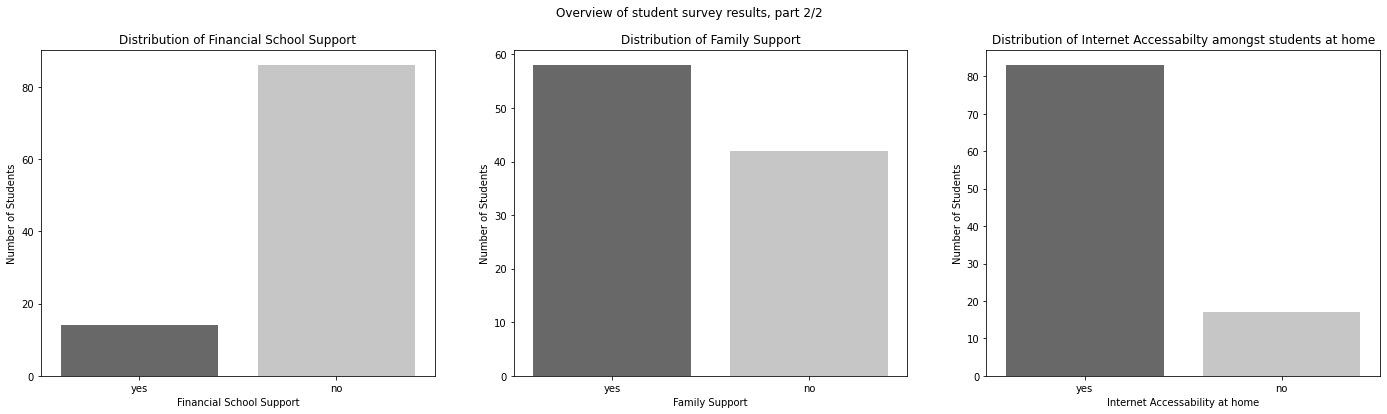

In [107]:
# Let's continue:
fig, axes = plt.subplots(1, 3, figsize=(24,6))
fig.suptitle('Overview of student survey results, part 2/2')

# Plot 1: Financial Support
plt.subplot(1,3,1).set_title('Distribution of Financial School Support')
sns.barplot(x=df_combined["schoolsup"].value_counts().index, y=df_combined["schoolsup"].value_counts(), order=["yes","no"], palette="Greys_r")
plt.ylabel('Number of Students')
plt.xlabel('Financial School Support')


# Plot 2: Family Support (not clarified if financial or other)
plt.subplot(1,3,2).set_title('Distribution of Family Support')
sns.barplot(x=df_combined["famsup"].value_counts().index, y=df_combined["famsup"].value_counts(), palette="Greys_r")
plt.ylabel('Number of Students')
plt.xlabel('Family Support')

# Plot 3: Internet
plt.subplot(1,3,3).set_title('Distribution of Internet Accessabilty amongst students at home')
sns.barplot(x=df_combined["internet"].value_counts().index, y=df_combined["internet"].value_counts(), palette="Greys_r")
plt.ylabel('Number of Students')
plt.xlabel('Internet Accessability at home')
plt.show()

From this second part we learned that:
1. Only very few students receive financial school support whilst most students receive family support
2. Suprisingly, still about ~17% of students dont have an internet connection at home

Last but not least, lets have a closer look at the alcohol consumption:

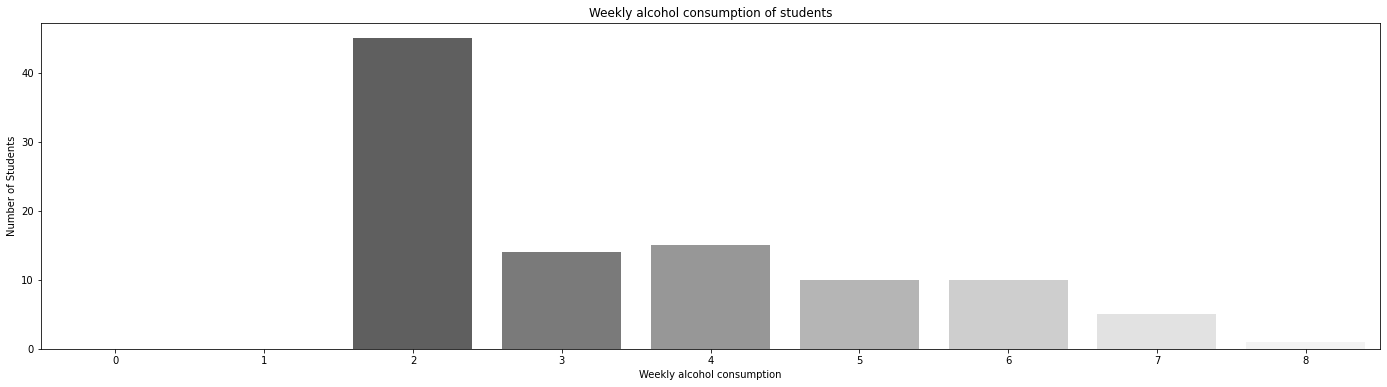

In [110]:
# Last but not least, lets have a closer look at the alcohol consumption:
list = []
for i in range(9):
    list.append(len(df_combined[df_combined.Alc_sum == i]))
plt.figure(figsize = (24,6))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8], y = list, palette="Greys_r")
plt.title('Weekly alcohol consumption of students')
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')
plt.show()

Also interesting: There is no student absent from alcohol, even though some of them are only at the age of 15!

Now that we grasped a better understanding of some important factors of the dataset, lets take the next step.

_________
### Step 4 - Linear relationships: Find linear relationships in the data by using correlation plots and interpret the results. 
(Conclusios should be taken too serious)

__4.1 - Alcohol:__ Obviously, now that we looked at the __alcohol consumption,__ we want to see if there is a relation to students grades. Lets investigate:

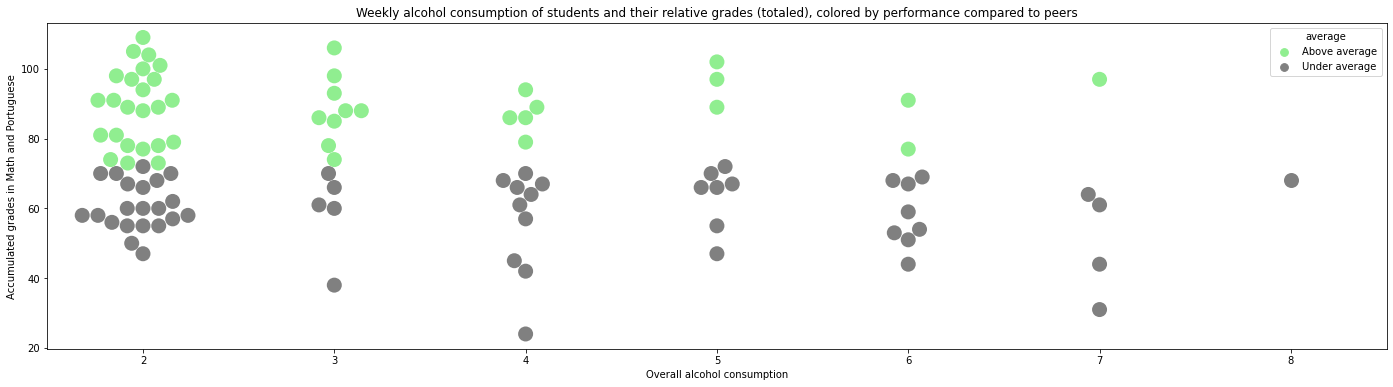

In [130]:
# Helper variable to calculate the grade average:
avg = sum(df_combined["G_sum"])/float(len(df_combined))

# Helper columns in the dataset:
df_combined['average_line'] = avg
df_combined['average'] = ['Above average' if i > avg else 'Under average' for i in df_combined["G_sum"]]

# Let's plot that:
plt.figure(figsize = (24,6))
sns.swarmplot(x='Alc_sum', y = 'G_sum', hue = 'average',data= df_combined, palette={'Above average':'lightgreen', 'Under average': 'grey'}, size=15)
plt.title('Weekly alcohol consumption of students and their relative grades (totaled), colored by performance compared to peers')
plt.ylabel('Accumulated grades in Math and Portuguese')
plt.xlabel('Overall alcohol consumption')
plt.show()

One can clearly see that: <br>
1. the higher the alcohol consumption the worse the students perform in comparison to their peers.<br>
2. In reverse the same logic applies: The less alcohol students consume per week the better their total grades are in comparison to the other students. 

Conclusio:
_What we know from traffic also holds accountable for school: Don't drink and drive / learn_

After this first initial deep dive (to spark curiosity and to follow or train of thought of students alcohol consumption), lets get an overview of correlations between all factors:

In [145]:
# Let's check a correlation triangle for all factors

# Function to convert text/string columns to categories
def convert_cat_2_num(df):
    """convert the columns of a DataFrame into category type"""
    temp_df = pd.DataFrame()

    for column in df.columns:
        temp_df[column] = df[column].astype("category").cat.codes
    return temp_df

df_converted = convert_cat_2_num(df_combined.iloc[:,1:40]) # we dont need the newly created helper columns

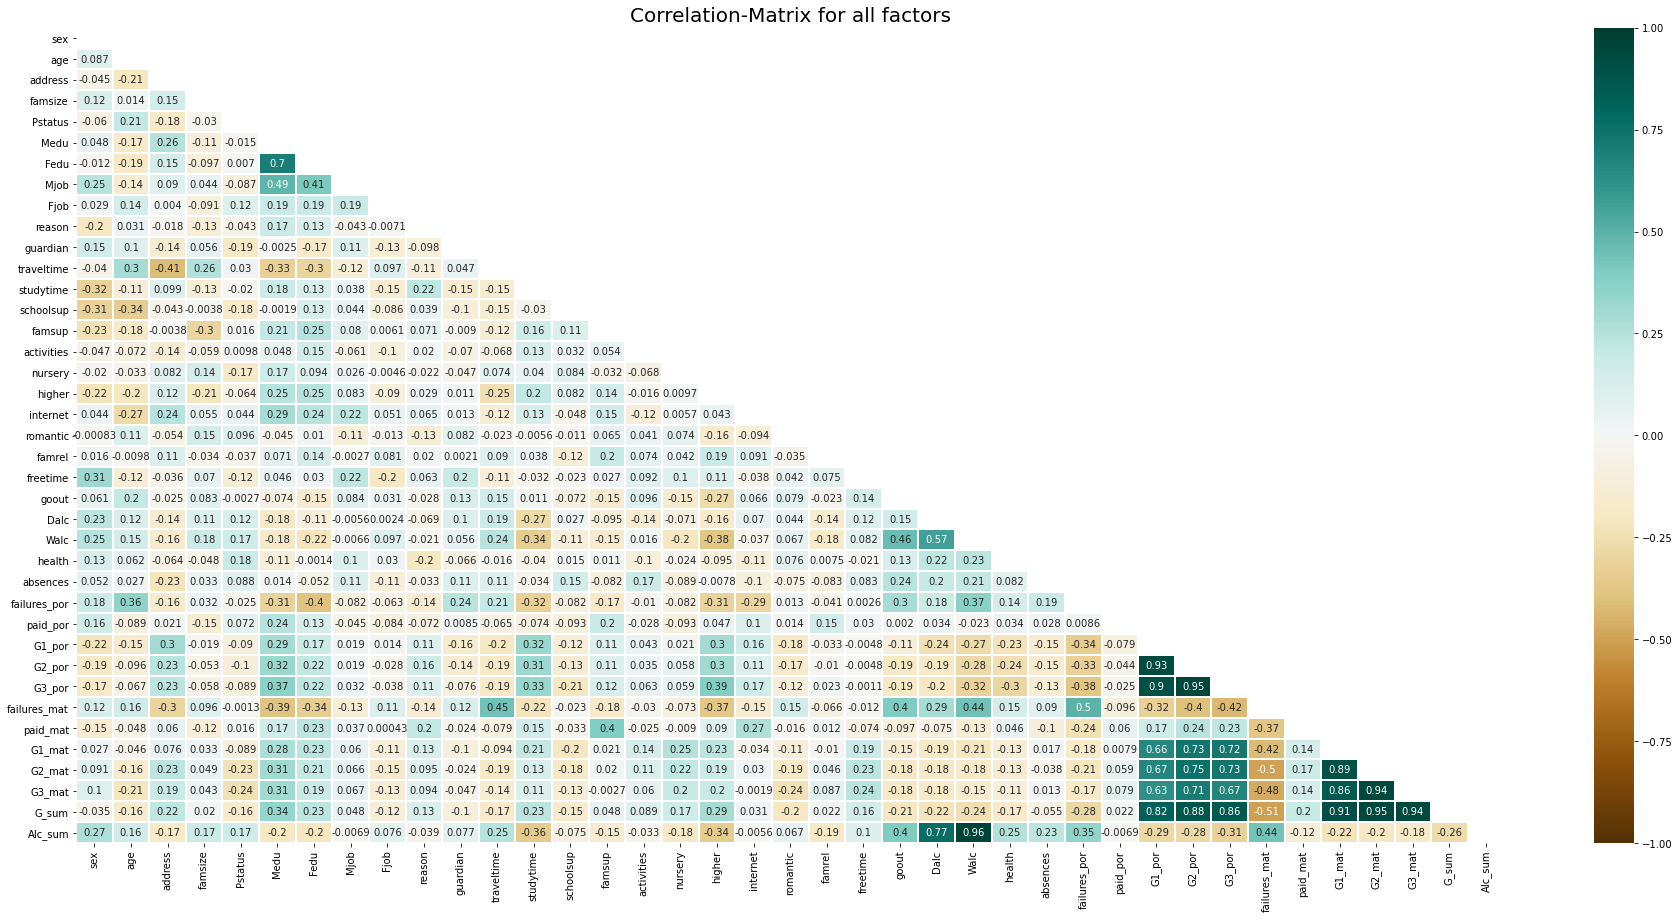

In [187]:
plt.figure(figsize=(32,15))
mask = corr = np.triu(df_converted[df_converted.columns].corr())
corr = df_converted[df_converted.columns].corr()
plt.title("Correlation-Matrix for all factors", fontsize=20)
sns.heatmap(corr,annot=True, linecolor="white", linewidth=1, vmin = -1, vmax = 1, cmap = "BrBG", mask=mask);

Now that we investigated the influence of alcohol on grades and checked the total correlation grid (correlation matrix above), lets look at other factors that either stand out from the matrix or seem still interesting: <br>
- __4.2. Education__ of their __parents,__ especially from mother (0.34) <br>
- __4.3. Studytime,__ Reminder: this is only a survey with a self estimation and students easy can make false claims (0.23) <br>
- __4.4. Gender__ (-0.035) <br>
- __4.5. Ambition__ and intention of students to pursue a higher education (0.29) <br>

__4.2 - Parental Education:__ <br>
As we know from the correlation matrix the indicated correlation factor is 0.34 res. 0.23.<br>
The initial thought, that parents have a significant impact on pupils/students grades is justified. But mothers have a way bigger influence on their children than fathers do, which is a noteworthy insight. 

Conclusio:
_In doubt, she is right._

__4.3 - Studytime:__<br>
Once again, the initial intuition is confirmed with the results from the correlation matrix but a second look to the details is interesting:

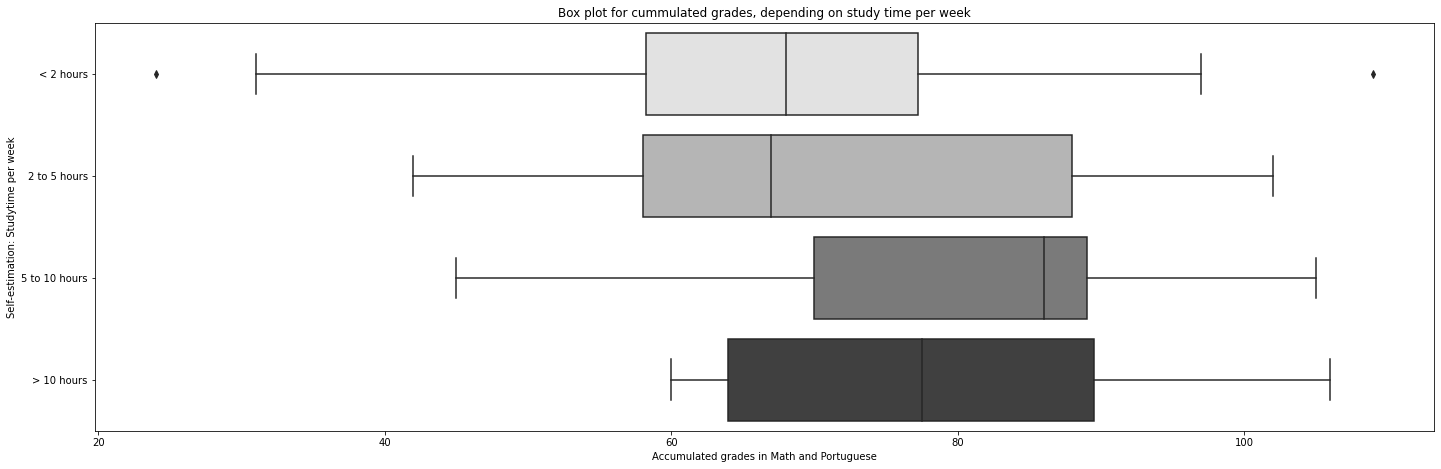

In [186]:
# Let's create an additional column and sort the study times respectively
df_combined['st_time'] = np.nan
df_temp = [df_combined]

# Let's loop through the rows and add the detailed description:
for col in df_temp:
    col.loc[col['studytime'] == 1 , 'st_time'] = '< 2 hours'
    col.loc[col['studytime'] == 2 , 'st_time'] = '2 to 5 hours'
    col.loc[col['studytime'] == 3, 'st_time'] = '5 to 10 hours'
    col.loc[col['studytime'] == 4, 'st_time'] = '> 10 hours' 

# Now we can plot the result:
plt.figure(figsize=(24,7.5))
plt.title("Box plot for cummulated grades, depending on study time per week")
sns.boxplot(y="st_time", x="G_sum", data = df_combined , orient="h", palette = 'Greys', order= ['< 2 hours','2 to 5 hours','5 to 10 hours','> 10 hours'])
plt.xlabel('Accumulated grades in Math and Portuguese')
plt.ylabel('Self-estimation: Studytime per week')
plt.show()

What do we learn from these boxplots:<br>
1. The right skew of the boxes re-confirm that the more you study the higher the chances you score high grades
2. But also interesting: If you study a lot (>10 hours per week) you definately eradicate the chances of scoring 60 in all accumulated tests. 
<br>

_Conclusio: Fortune rewards the diligent is true =)_

__4.4 - Gender:__<br>
Apparently gender has no significant influence on your success as a student, which can be interpreted as an indication for gender equality in the educational system.

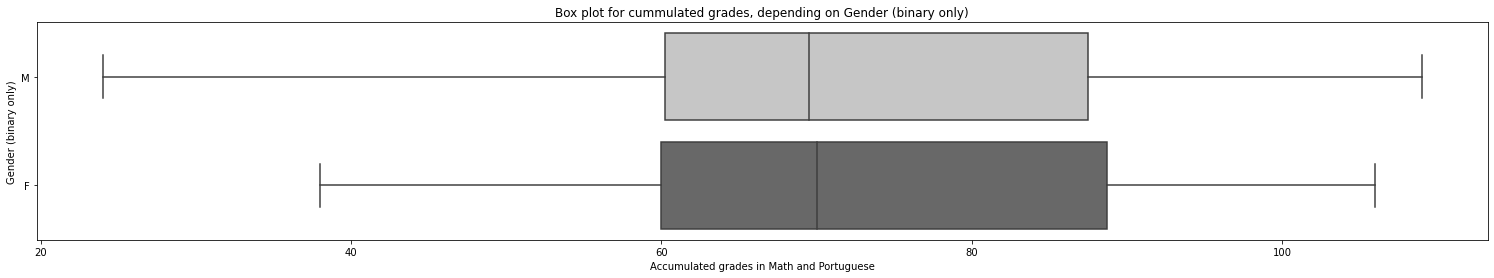

In [197]:
# Let's plot the performance by gender:
plt.figure(figsize=(26,4))
plt.title("Box plot for cummulated grades, depending on Gender (binary only)")
sns.boxplot(y="sex", x="G_sum", data = df_combined , orient="h", palette = 'Greys', order = ["M","F"])
plt.xlabel('Accumulated grades in Math and Portuguese')
plt.ylabel('Gender (binary only)')
plt.show()

From this visualization we can:<br>
1. Reconfirm that gender has no significant influence on your success as a student
2. But one can also see that male students have a wider spread in their grades

Conclusio: _Men can be real idiots or genius_

__4.5 - Ambition:__ <br>
As we know from the correlation matrix the indicated correlation factor is the second highest (relevant) factor with 0.29.<br>
That is intersting, only the ambition to reach higher correlates with good grades. But here we are again at the discussion of cause and effect. We leave it with the following conclusio.

Conclusio:
_Dreaming big helps!_

_________
### Step 5 - Hypothesis Tests: Use hypothesis tests wisely to see if different groups in the data behave differently.

Let's first define the hypothesis we are trying to evaluate:<br> 
- Null hypothesis: There is no difference between the grades of men & women<br> 
- Alternative hypothesis: There is a difference between the grades of men & women<br>

Now let's discuss what steps we need to take to test our hypothesis. Permutation tests are the best for testing hypotheses and the bootstrapping method is the best for estimating confidence intervals. We will use both and use the followig steps:<br>
- __5.1 - EDA Analysis:__ We will plot the Emperical & Theoretical CDF (Cumulative Distribution Function) for men & wemon to examine the data distribution and visually understand the difference in gradings<br>
- __5.2 - T-Test:__ We will determine if there is a significant difference between the responses of men & women<br>
- __5.3 - Boostrap Resampling:__ We will generate boostrap replicates of the difference in mean value and use it to caluclate the confidence interval (Details follow)
- __5.4 - Permutation Resampling:__ We will create permutation replicates to test the hypotheses, assuming 0.05 is the limit to reject our null hypothesis 

__5.1 - EDA Analysis:__

In [246]:
# Let's prepare functions to generate Emperical CDF, Theoretical CDF and then plot the charts 
def cdf(data):
    # generate Empirical CDF
    x = np.sort(data)
    y = np.arange (1,len(x)+1) / len(x)  
    return x,y

def theor_cdf(data, size):
    # generate Theoretical CDF
    mean = np.mean(data)
    std = np.std(data)
    np.random.seed(42)
    sample = np.random.normal(mean,std,size)
    return cdf(sample)

def plot_cdf(data, color='C0'):
    # plotting the Empirical CDF
    x1,y1 = cdf(data)
    plt.plot(x1,y1,marker='.',color=color, linestyle='none')
    plt.axvline(np.mean(data), color=color, linestyle='--')

    #plotting Theoretical CDF
    x11, y11 = theor_cdf(data, 1000)
    plt.plot(x11,y11, color=color)

In [211]:
# Before we can use the functions above, we need to substract the right datasets from the combined dataframe
women = df_combined[df_combined['sex']=="F"]['G_sum']
men = df_combined[df_combined['sex']=="M"]['G_sum']

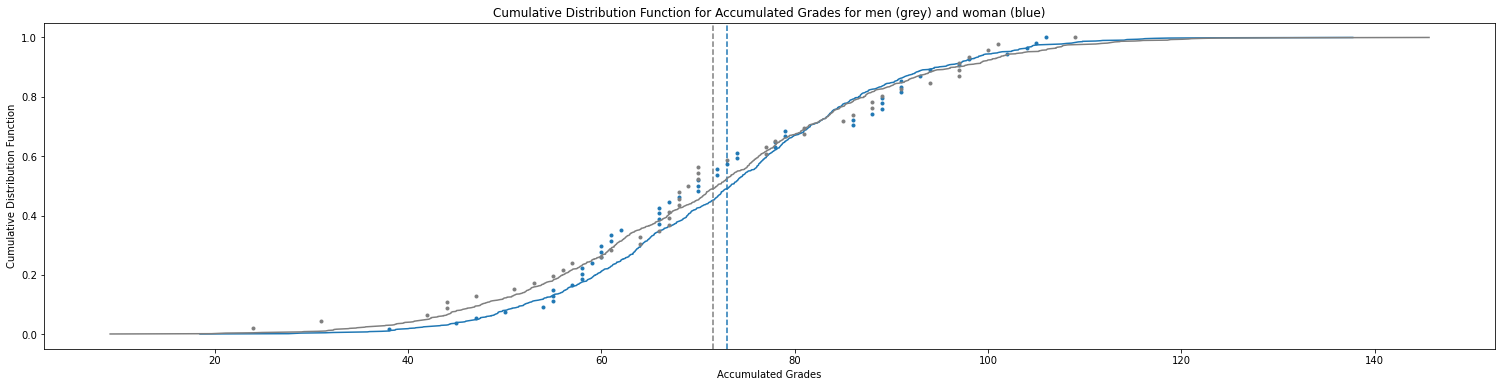

In [240]:
# The EDA shows that the mean values of answers for men and women are very comparable, but still slightly different
plt.figure(figsize=(26,6))
plot_cdf(women,"C0")
plot_cdf(men,"C7")
plt.title("Cumulative Distribution Function for Accumulated Grades for men (grey) and woman (blue)")
plt.xlabel("Accumulated Grades")
plt.ylabel("Cumulative Distribution Function")
plt.show()

__5.2 - T-Test:__

In [270]:
# Now that we see the normal distribution of both samples, let's use the independent 2-sample t-test
tst = ttest_ind(women,men)
print (tst)
print ("The p-value > 0.05, therefore, we have to reject the null hypothesis that there is no difference between women & men.")

Ttest_indResult(statistic=0.3957956059363731, pvalue=0.6931161688250369)
The p-value > 0.05, therefore, we have to reject the null hypothesis that there is no difference between women & men.


In [271]:
# Let's now calculate the difference of mean between men & women
emp_diff = np.mean(women) - np.mean(men)
print("The empirical difference of",emp_diff,"in their grades is rather small (~1% of max) but still noticable.")

The empirical difference of 1.4412238325281805 in their grades is rather small (~1% of max) but still noticable.


__5.3 - Bootstrap:__

In [252]:
def bootstrap_reps(data1, data2, size):
    # Generate multiple bootstrap replicates.
    con = np.concatenate([data1,data2])
    con_mean = np.mean(con)
    
    data1_shifted = data1 - np.mean(data1) + con_mean
    data2_shifted = data2 - np.mean(data2) + con_mean
    
    data1_bs_reps = np.empty(size)
    data2_bs_reps = np.empty(size)
    
    for i in range (size):
        reps1 = np.random.choice(data1_shifted, size=len(data1_shifted))
        reps2 = np.random.choice(data2_shifted, size=len(data2_shifted))
        
        data1_bs_reps[i] = np.mean(reps1)
        data2_bs_reps[i] = np.mean(reps2)        
            
    # Get replicates of difference of means
    bs_replicates = data1_bs_reps - data2_bs_reps
    
    return bs_replicates

In [273]:
# With the bootstrap resampling method, we will enlarge the sample and draw 1000 bootstrap replicates
bs_replicates = bootstrap_reps(women, men,1000)

# Compute the confidence interval
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print ('The 5%-Confidence interval is in ', conf_int,"and therefore seems larger than initially expected.")

The 5%-Confidence interval is in  [-6.95738728  7.521719  ] and therefore seems larger than initially expected.


__5.4 - Permutation Resampling:__<br>

    - Subtract the mean value of total sample (men & women) to generate data_shifted for men & women.
    - calculate bootstrap replicates of the mean from data_shift for  men & women and compute the estimated difference in mean.
    - Cacluate 95% Confidence Interval. 
    

In [208]:
def perm_reps(data1, data2, size):
    # Generate multiple permutation replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        tr_perm = np.random.permutation(np.concatenate([data1,data2]))
        perm_sample_1 = tr_perm[:len(data1)]
        perm_sample_2 = tr_perm[len(data1):]
     
        perm_replicates[i] = np.mean(perm_sample_1) - np.mean(perm_sample_2)

    return perm_replicates

In [274]:
# With the permutation resampling method, we will draw 10000 permutation replicates
perm_replicates = perm_reps(women, men,10000)

# Compute p-value
p = np.sum(perm_replicates >= emp_diff) / len(perm_replicates)
print('p-value =', p)
print ("p-value > 0.05, therefore, we can reject the null hypothesis that there is no difference between men & women even with the resampled sets.\n\n")

p-value = 0.3523
p-value > 0.05, therefore, we can reject the null hypothesis that there is no difference between men & women even with the resampled sets.




Our learnings from the statistical hypothesis testing:
- So after the first tests with our emprical sample of women and men, we derived to the conclusion that our null hypothesis "There is no difference between the grades of men & women" is rejected. <br>
- After both resampling methods (bootstrapping and permutation), we had to reject the null hypothesis again.<br>
- In conclusion we see that there is a slight difference in grades of men and women, but looking at the sample size and the boxplot analysis above my suggestion is to investigate further with additional surveys before jumping to conclusions

______________________________
______________________________
## BACKUP

In [199]:
# Now we have to join (in this case concatenate not merge) the two sets.
# We have to be aware that there are several (TBD) students that belong to both datasets. These students can be identified by searching for identical attributes.
## Hence only a few students in the math class (TBD) have to be added to the portugese class to have a complete set.
df = pd.concat([df_mat, df_por])
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,failures_mat,paid_mat,G1_mat,G2_mat,G3_mat,failures_por,paid_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0.0,no,5.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,0.0,no,5.0,5.0,6.0,NaN,NaN,NaN,NaN,NaN
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3.0,yes,7.0,8.0,10.0,NaN,NaN,NaN,NaN,NaN
3,GP,F,15,U,GT3,T,4,2,health,services,...,0.0,yes,15.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN
4,GP,F,16,U,GT3,T,3,3,other,other,...,0.0,yes,6.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,NaN,NaN,NaN,NaN,NaN,1.0,no,10.0,11.0,10.0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,NaN,NaN,NaN,NaN,NaN,0.0,no,15.0,15.0,16.0
646,MS,F,18,U,GT3,T,1,1,other,other,...,NaN,NaN,NaN,NaN,NaN,0.0,no,11.0,12.0,9.0
647,MS,M,17,U,LE3,T,3,1,services,services,...,NaN,NaN,NaN,NaN,NaN,0.0,no,10.0,10.0,10.0


In [200]:
# In order to find the exact duplicate we have to resort the datasets in a way that general information that wont change depending on the course you visit come first (eg. age, sex etc) 
# and course-specific information come second. In this case it is only ["paid","G1","G2","G3"].
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'failures_mat', 'paid_mat', 'G1_mat', 'G2_mat', 'G3_mat',
       'failures_por', 'paid_por', 'G1_por', 'G2_por', 'G3_por'],
      dtype='object')

In [201]:
df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,failures_mat,paid_mat,G1_mat,G2_mat,G3_mat,failures_por,paid_por,G1_por,G2_por,G3_por
296,GP,M,18,U,GT3,T,2,1,other,other,...,NaN,NaN,NaN,NaN,NaN,0.0,no,16.0,16.0,16.0
195,GP,M,16,U,GT3,T,3,3,services,other,...,NaN,NaN,NaN,NaN,NaN,0.0,no,11.0,12.0,13.0
317,GP,F,18,U,GT3,T,4,3,other,other,...,0.0,yes,9.0,10.0,9.0,NaN,NaN,NaN,NaN,NaN
579,MS,M,18,U,LE3,T,1,3,at_home,services,...,NaN,NaN,NaN,NaN,NaN,0.0,no,9.0,10.0,9.0
583,MS,F,18,R,GT3,T,2,2,other,other,...,NaN,NaN,NaN,NaN,NaN,1.0,no,8.0,6.0,0.0
187,GP,M,16,U,LE3,T,2,1,other,other,...,0.0,yes,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN
382,GP,F,17,U,GT3,T,3,3,at_home,other,...,NaN,NaN,NaN,NaN,NaN,0.0,yes,11.0,12.0,11.0
476,MS,F,16,R,LE3,T,2,1,other,other,...,NaN,NaN,NaN,NaN,NaN,0.0,no,10.0,8.0,8.0
281,GP,M,16,U,GT3,T,0,2,other,other,...,NaN,NaN,NaN,NaN,NaN,0.0,no,11.0,12.0,11.0
367,GP,F,17,U,LE3,T,2,1,other,other,...,NaN,NaN,NaN,NaN,NaN,0.0,no,11.0,12.0,14.0


'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'